# Project 3 - Cheri Hung

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [9]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [10]:
# frequency table for prestige and whether or not someone was admitted
# prestige: 1 = most prestigious, 4 = least prestigious
admit = df['admit']
pres = df['prestige']
pd.crosstab(pres, admit)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [11]:
presDummy = pd.get_dummies(df.prestige.apply(int), prefix='prestige') #convert prestige to int to remove the extra .0
presDummy.head(3)

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: To avoid the dummy trap problem, we should drop one variable/column from the model. And we should drop prestige_1 as the baseline since prestige_1 and prestige_4 are basically inversed of each other.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [14]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(presDummy.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61           0           0           1           0
1      1  660.0  3.67           0           0           1           0
2      1  800.0  4.00           1           0           0           0
3      1  640.0  3.19           0           0           0           1
4      0  520.0  2.93           0           0           0           1


In [23]:
#frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(df['prestige'], df['admit'], rownames=['prestige'],margins=True)

admit,0,1,All
prestige,,,
1.0,28,33,61
2.0,95,53,148
3.0,93,28,121
4.0,55,12,67
All,271,126,397


In [24]:
#crosstab prestige 1 admission 
CT_pres1 = pd.crosstab(handCalc.prestige_1, handCalc.admit, margins=True)
CT_pres1

admit,0,1,All
prestige_1,,,
0,243,93,336
1,28,33,61
All,271,126,397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [25]:
sum_pres1 = float(CT_pres1.iat[1, 2])
print sum_pres1 

pA = 33/sum_pres1 # (#1 students who were admitted) / (all #1 students)
print "===Odds of being admitted if you attended #1 ranked school==="
print pA

61.0
===Odds of being admitted if you attended #1 ranked school===
0.540983606557


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [26]:
sum_nonpres1 = float(CT_pres1.iat[0, 2])
print sum_nonpres1 

pB = 93/sum_nonpres1 # (non-#1 students who were admitted) / (all non-#1 students)
print "===Odds of being admitted if you did not attended #1 ranked school==="
print pB

336.0
===Odds of being admitted if you did not attended #1 ranked school===
0.276785714286


#### 3.3 Calculate the odds ratio

In [27]:
pA_OR = pA / float(1-pA)
pB_OR = pB / float(1-pB)

print "===Odds of being admitted if you attended #1 ranked school==="
print "Probability:", pA
print "Odds Ratio:", pA_OR
print " "
print "===Odds of being admitted if you did not attended #1 ranked school==="
print "Probability:", pB
print "Odds Ratio:", pB_OR
print " "
print "===Odds Ratio of admission (#1 over non-#1)==="
print pA_OR / pB_OR

===Odds of being admitted if you attended #1 ranked school===
Probability: 0.540983606557
Odds Ratio: 1.17857142857
 
===Odds of being admitted if you did not attended #1 ranked school===
Probability: 0.276785714286
Odds Ratio: 0.382716049383
 
===Odds Ratio of admission (#1 over non-#1)===
3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: Students from schools ranked #1 in prestige are 3.079 times more likely to be admitted than students not from a #1 prestige school.

#### 3.5 Print the cross tab for prestige_4

In [28]:
CT_pres4 = pd.crosstab(handCalc.prestige_4, handCalc.admit, margins=True)
CT_pres4

admit,0,1,All
prestige_4,,,
0,216,114,330
1,55,12,67
All,271,126,397


#### 3.6 Calculate the OR 

In [29]:
sum_pres4 = float(CT_pres4.iat[1, 2])
print sum_pres4 
sum_nonpres4 = float(CT_pres4.iat[0, 2])
print sum_nonpres4

pC = 12/sum_pres4 # (#4 students who were admitted) / (all #4 students)
pD = 114/sum_nonpres4 # (non-#4 students who were admitted) / (all non-#4 students)
pC_OR = pC / float(1-pC)
pD_OR = pD / float(1-pD)

print "===Odds of being admitted if you attended #4 ranked school==="
print "Probability:", pC
print "Odds Ratio:", pC_OR
print " "
print "===Odds of being admitted if you did not attended #4 ranked school==="
print "Probability:", pD
print "Odds Ratio:", pD_OR
print " "
print "===Odds Ratio of admission (#4 over non-#4)==="
print pC_OR / pD_OR

67.0
330.0
===Odds of being admitted if you attended #4 ranked school===
Probability: 0.179104477612
Odds Ratio: 0.218181818182
 
===Odds of being admitted if you did not attended #4 ranked school===
Probability: 0.345454545455
Odds Ratio: 0.527777777778
 
===Odds Ratio of admission (#4 over non-#4)===
0.413397129187


#### 3.7 Write this finding in a sentence

Answer: The rate of admission for students from #4 ranked schools is 0.413 times less likely than students not from a #4 ranked school.

## Part 4. Analysis

In [30]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(presDummy.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61           0           1           0
1      1  660.0  3.67           0           1           0
2      1  800.0  4.00           0           0           0
3      1  640.0  3.19           0           0           1
4      0  520.0  2.93           0           0           1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [31]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [32]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'prestige_2', u'prestige_3', u'prestige_4',
       u'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [33]:
model = sm.Logit(data['admit'], data[train_cols])
model_result = model.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [34]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 06 Apr 2017   Pseudo R-squ.:                 0.08166
Time:                        14:20:04   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept     -3.8769      1.142     -3.393      0.001        -6.116    -1.638
==============================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [35]:
params = model_result.params
conf = model_result.conf_int()
print "==Confidence interval=="
print conf
print " "
print "==Odds ratio of coefficients=="
print np.exp(params)

==Confidence interval==
                   0         1
gre         0.000074  0.004362
gpa         0.127619  1.431056
prestige_2 -1.301337 -0.058936
prestige_3 -2.014579 -0.662776
prestige_4 -2.371624 -0.735197
intercept  -6.116077 -1.637631
 
==Odds ratio of coefficients==
gre           1.002221
gpa           2.180027
prestige_2    0.506548
prestige_3    0.262192
prestige_4    0.211525
intercept     0.020716
dtype: float64


In [36]:
conf['Coefficients'] = params
conf.columns = ['2.5%', '97.5%', 'Coefficients']
conf_OR = np.exp(conf)
print "==Odds ratios of Coefficients and Confidence intervals=="
print conf_OR

==Odds ratios of Coefficients and Confidence intervals==
                2.5%     97.5%  Coefficients
gre         1.000074  1.004372      1.002221
gpa         1.136120  4.183113      2.180027
prestige_2  0.272168  0.942767      0.506548
prestige_3  0.133377  0.515419      0.262192
prestige_4  0.093329  0.479411      0.211525
intercept   0.002207  0.194440      0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: Coming from a #2 ranked prestige school decreases the student's odds of being admitted by 0.506 times or 50.6%.

#### 4.6 Interpret the OR of GPA

Answer: Given the other predicators staying fixed, with a 1 point increases in GPA would improve the student's odds of being admitted by 2.18 times or 118%.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [37]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [38]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print "==GRE mocks=="
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print "==GPA mocks=="
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
# cols: gre, gpa, prestige, intercept
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos.head()

==GRE mocks==
[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
==GPA mocks==
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


,0,1,2,3
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


#### 5.1 Recreate the dummy variables

In [39]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
presDummy = pd.get_dummies(combos['prestige'], prefix='prestige')
presDummy.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
presDummy.head(3)

,prestige_1,prestige_2,prestige_3,prestige_4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0


In [40]:
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(presDummy.ix[:, 'prestige_2':])
combos.head(3)

,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4
0,220.0,2.26,1.0,1.0,0,0,0
1,220.0,2.26,2.0,1.0,1,0,0
2,220.0,2.26,3.0,1.0,0,1,0


#### 5.2 Make predictions on the enumerated dataset

In [41]:
combos['pred_admitted'] = model_result.predict(combos[train_cols])
combos.tail(4)

,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4,pred_admitted
396,800.0,4.0,1.0,1.0,0,0,0,0.734040
397,800.0,4.0,2.0,1.0,1,0,0,0.582995
398,800.0,4.0,3.0,1.0,0,1,0,0.419833
399,800.0,4.0,4.0,1.0,0,0,1,0.368608


#### 5.3 Interpret findings for the last 4 observations

Answer: Given that GRE and GPA values are the same for all 4 results, we see that the higher the prestige ranking the higher the odds of being admitted. Also, the difference between #1 and #4 prestige is notable enough to rely on this analysis.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [42]:
#create two new dataframes as pivot tables, grouping gre/gpa by prestige value
gre_combo = pd.pivot_table(combos, values=['pred_admitted'], index=['prestige','gre'])
gpa_combo = pd.pivot_table(combos, values=['pred_admitted'], index=['prestige','gpa'])

print gre_combo.head(10)
print gpa_combo.head(10)


                     pred_admitted
prestige gre                      
1.0      220.000000       0.287000
         284.444444       0.315963
         348.888889       0.346366
         413.333333       0.378022
         477.777778       0.410706
         542.222222       0.444161
         606.666667       0.478106
         671.111111       0.512246
         735.555556       0.546277
         800.000000       0.579900
                   pred_admitted
prestige gpa                    
1.0      2.260000       0.279423
         2.453333       0.309664
         2.646667       0.341563
         2.840000       0.374905
         3.033333       0.409428
         3.226667       0.444831
         3.420000       0.480780
         3.613333       0.516920
         3.806667       0.552891
         4.000000       0.588339


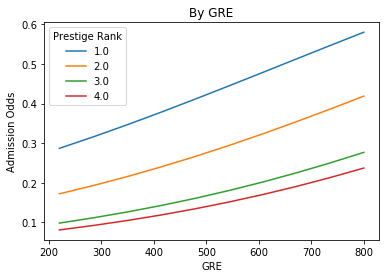

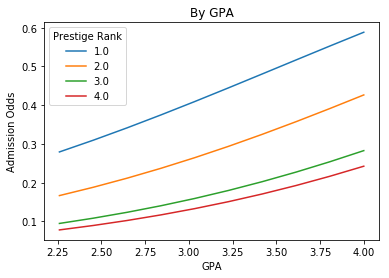

In [43]:
#get the grouping [1.0, 2.0, 3.0, 4.0] for chart lines
pres_groups = combos.prestige.unique()

def plot_chart(df, typeName):

    for prestige in pres_groups:
        pres_group_df = df.ix[df.index.get_level_values("prestige")==prestige]
        plt.plot(pres_group_df.index.get_level_values(typeName), pres_group_df['pred_admitted'])
        
    plt.title("By " + typeName.upper())
    plt.xlabel(typeName.upper())
    plt.ylabel("Admission Odds")
    pl.legend(pres_groups, loc='upper left', title='Prestige Rank')
    plt.show()

plot_chart(gre_combo, 'gre')
plot_chart(gpa_combo, 'gpa')